**Desarrollo de Arboles de Decisión**

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo
5. Entrenar el modelo configurando los diferentes hiperparámetros
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos
9. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/

**1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.**

In [1]:
#Importamos las librerias que son necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [2]:
#Cargamos el dataset y mostramos las 5 primeras filas
datos = pd.read_csv("winequality-red.csv")
datos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
datos.shape

(1599, 12)

In [4]:
datos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario**

In [5]:
# Verificamos si existen datos nulos
datos.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

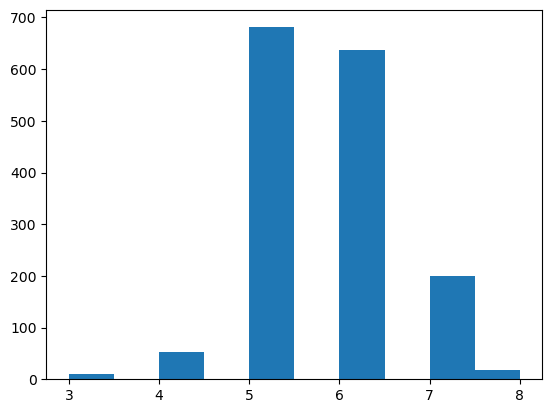

In [6]:
plt.hist(datos.quality)

Hay un mayor aumento en la calidad: 5

<Axes: xlabel='fixed acidity', ylabel='alcohol'>

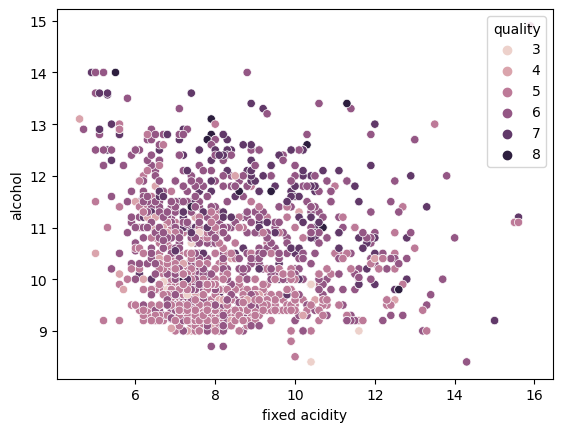

In [7]:
# Realizamos un diagrama de dispersión
sns.scatterplot(x="fixed acidity", y="alcohol", hue="quality", data=datos)

El diagrama de dispersión muestra una correlación positiva débil entre la acidez fija y el contenido de alcohol del vino. 
Esto significa que a medida que aumenta la acidez fija de un vino, el contenido de alcohol tiende a aumentar también. 
Sin embargo, la correlación no es fuerte y hay mucha dispersión en los datos. 
Esto hace que existan muchos vinos con acidez fija alta que tienen baja graduación alcohólica y viceversa.

**3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características**

In [8]:
predictors_col = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", 
                  "density", "pH", "sulphates", "alcohol"] # nombres de las características de entrada para el modelo de aprendizaje
target_col = ['quality'] # nombre de la variable objetivo que se desea predecir

In [9]:
# se prepara el conjunto de datos para ser utilizado en el entrenamiento del modelo de aprendizaje
predictors = datos[predictors_col]
target = datos[target_col]

In [10]:
# con predictors obtendremos los datos relevantes para el análisis
predictors

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [11]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [12]:
# a continuación, hallamos la correlación entre las variables predictoras
corr = predictors.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


Sobre la matriz de correlación:
Un coeficiente de correlación de 1 indica una correlación positiva perfecta, lo que significa que las dos variables siempre aumentan o disminuyen juntas. 
Un coeficiente de correlación de -1 indica una correlación negativa perfecta, lo que significa que una variable siempre aumenta mientras la 
otra disminuye. Un coeficiente de correlación de 0 indica que no hay correlación, lo que significa que no existe relación entre las dos variables.

Con base en la matriz de correlación, podemos hacer las siguientes observaciones sobre las relaciones entre los parámetros de calidad del vino:

La acidez fija se correlaciona positivamente con el ácido cítrico y los sulfatos. Esto significa que los vinos con mayor acidez fija también tienden a tener niveles más altos de ácido cítrico y sulfato.

La acidez volátil se correlaciona negativamente con el azúcar residual. Esto significa que los vinos con mayor acidez volátil tienden a tener niveles más bajos de azúcar residual.

El ácido cítrico se correlaciona positivamente con el azúcar residual y los sulfatos. Esto significa que los vinos con niveles más altos de ácido cítrico también tienden a tener niveles más altos de azúcar residual y sulfato.

El azúcar residual se correlaciona positivamente con el alcohol. Esto significa que los vinos con niveles más altos de azúcar residual también tienden a tener niveles más altos de alcohol.

Los cloruros se correlacionan positivamente con el dióxido de azufre total. Esto significa que los vinos con niveles más altos de cloruro también tienden a tener niveles más altos de dióxido de azufre total.

El dióxido de azufre libre se correlaciona negativamente con el pH. Esto significa que los vinos con niveles más altos de dióxido de azufre libre tienden a tener niveles de pH más bajos.

El dióxido de azufre total se correlaciona positivamente con la densidad y el pH. Esto significa que los vinos con niveles más altos de dióxido de azufre total también tienden a tener niveles de densidad y pH más altos.

La densidad se correlaciona positivamente con el pH y los sulfatos. Esto significa que los vinos con niveles de densidad más altos también tienden a tener niveles de pH y sulfato más altos.

El pH se correlaciona positivamente con los sulfatos. Esto significa que los vinos con niveles de pH más altos también tienden a tener niveles más altos de sulfato.

Los sulfatos se correlacionan positivamente con el alcohol. Esto significa que los vinos con niveles más altos de sulfato también tienden a tener niveles más altos de alcohol.

El alcohol se correlaciona negativamente con la acidez volátil. Esto significa que los vinos con niveles de alcohol más altos tienden a tener niveles de acidez volátil más bajos.

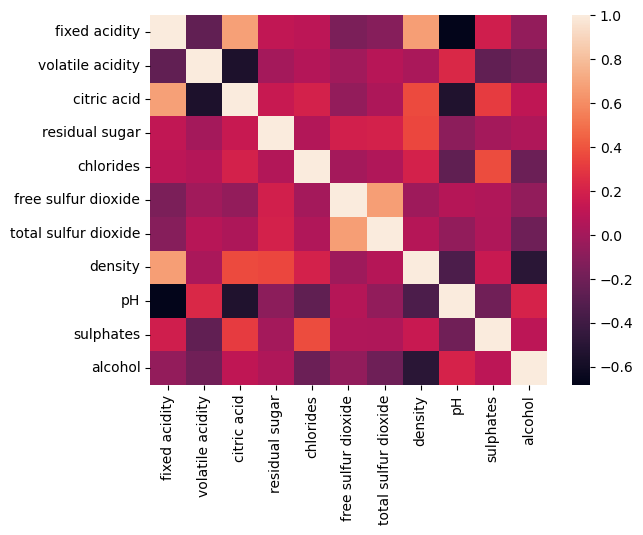

In [13]:
sns.heatmap(corr)
plt.show()

**4.Dividir el dataset en Train y Test para evaluar correctamente el modelo**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.25, random_state=13)

train_test_split se usa para dividir los datos en conjuntos de entrenamiento y prueba. En este caso, se utiliza para dividir los predictorsdatos target en un conjunto de entrenamiento y un conjunto de prueba con un tamaño de prueba de 0,25 (es decir, el 25% de los datos se utilizará para las pruebas) y un estado aleatorio de 13 (lo que garantiza que los datos se divida de forma reproducible).

In [15]:
# se establece lo siguiente para crear el arbol de desición
tree = DecisionTreeClassifier()

**5. Entrenar el modelo configurando los diferentes hiperparámetros**

In [16]:
# se procede a entrenar el arbol de desición
arbol = tree.fit(X_train, y_train)

[Text(0.48340907136233097, 0.9791666666666666, 'x[10] <= 10.525\ngini = 0.644\nsamples = 1199\nvalue = [8, 42, 500, 487, 150, 12]'),
 Text(0.23730994600335048, 0.9375, 'x[9] <= 0.535\ngini = 0.542\nsamples = 725\nvalue = [5, 27, 423, 246, 24, 0]'),
 Text(0.03900921383271509, 0.8958333333333334, 'x[1] <= 0.335\ngini = 0.369\nsamples = 173\nvalue = [2, 13, 135, 22, 1, 0]'),
 Text(0.021060189063060907, 0.8541666666666666, 'x[2] <= 0.43\ngini = 0.54\nsamples = 10\nvalue = [0, 1, 3, 6, 0, 0]'),
 Text(0.017231063778868017, 0.8125, 'x[9] <= 0.485\ngini = 0.56\nsamples = 5\nvalue = [0, 1, 3, 1, 0, 0]'),
 Text(0.013401938494675122, 0.7708333333333334, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0, 0, 0]'),
 Text(0.021060189063060907, 0.7708333333333334, 'x[6] <= 33.0\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 0, 1, 0, 0]'),
 Text(0.017231063778868017, 0.7291666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0]'),
 Text(0.024889314347253798, 0.7291666666666666, 'gini = 0.0\nsamples = 

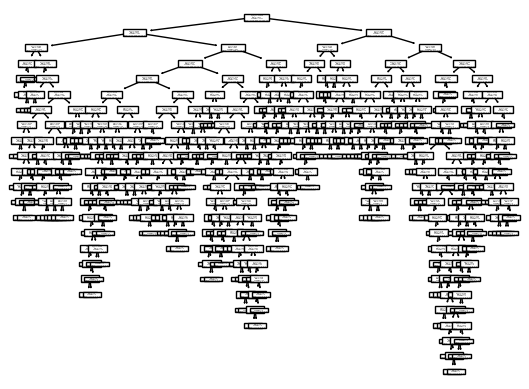

In [17]:
# a continuación se pretende observar el arbol de desición
plot_tree(arbol)

In [18]:
predicciones = arbol.predict(X_test)

In [19]:
predicciones

array([7, 5, 5, 5, 6, 5, 6, 7, 5, 5, 5, 6, 5, 6, 7, 7, 6, 7, 5, 7, 5, 6,
       7, 5, 6, 7, 5, 5, 5, 7, 7, 5, 5, 6, 5, 6, 5, 6, 6, 7, 5, 5, 6, 6,
       5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 7, 5, 5, 6, 6, 5, 5, 7, 5, 5, 6, 7,
       6, 7, 5, 6, 6, 5, 7, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 5, 7, 6,
       6, 6, 6, 6, 7, 7, 7, 6, 5, 6, 6, 5, 7, 6, 5, 5, 7, 5, 6, 6, 5, 7,
       7, 6, 6, 6, 5, 6, 6, 7, 4, 7, 7, 5, 5, 6, 5, 5, 5, 5, 6, 7, 6, 5,
       5, 7, 5, 5, 7, 5, 6, 7, 5, 5, 5, 6, 7, 4, 6, 5, 6, 5, 5, 6, 5, 5,
       5, 5, 5, 6, 6, 6, 6, 7, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5, 5, 5, 6, 5,
       5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 7,
       5, 5, 6, 6, 5, 6, 7, 6, 6, 5, 5, 5, 6, 5, 5, 6, 7, 5, 6, 5, 5, 7,
       5, 5, 7, 6, 7, 6, 5, 5, 6, 7, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6,
       5, 6, 5, 6, 8, 5, 5, 7, 6, 5, 5, 5, 6, 5, 7, 7, 6, 7, 6, 6, 7, 5,
       6, 5, 6, 7, 6, 5, 7, 4, 5, 5, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 7, 4,
       6, 7, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 7,

**6.Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.**

Creamos una matriz de confusión para evaluar el rendimiento del modelo en el conjunto de prueba

In [20]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,0,0,2,0,0
4,1,2,7,1,0,0
5,0,1,123,44,13,0
6,0,2,41,83,23,2
7,0,0,5,19,24,1
8,0,0,1,3,2,0


In [21]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.58

**7.Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.**

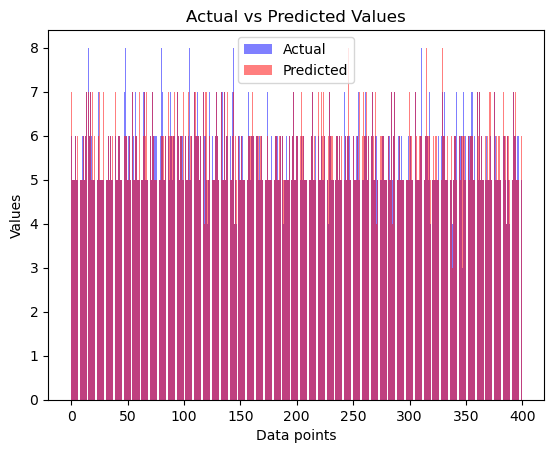

In [22]:
# Crea una lista de valores reales
actual = [y[0] for y in y_test.values.tolist()]

# Crea una lista de valores predichos
predicted = predicciones

# Crea un diagrama de barras
plt.bar(range(len(actual)), actual, color='blue', alpha=0.5, align='center', label='Actual')
plt.bar(range(len(actual)), predicted, color='red', alpha=0.5, align='center', label='Predicted')

# Add labels and title
plt.xlabel('Data points')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()

# Show the plot
plt.show()

**8.Interpretar, analizar y documentar los resultados obtenidos.**

De la matriz de confusión podemos interpretar:

La matriz de confusión evalúa el rendimiento del modelo de aprendizaje automático para clasificar la calidad del vino. La calidad del vino se clasifica en una escala de 1 a 8, donde 1 es la calidad más baja y 8 es la más alta. La matriz muestra el número de instancias que se clasificaron correctamente y el número de instancias que se clasificaron incorrectamente en cada categoría de calidad.
El modelo tiene un buen rendimiento. Sin embargo, el rendimiento del modelo varía según la categoría de calidad. El modelo es muy preciso para clasificar vinos de calidad 3 y 7, pero tiene un rendimiento más bajo para clasificar vinos de calida 4 y 8.

Del diagrama de barras podemos interpretar:

El diagrama de barras ilustra la distribución de las predicciones del modelo para la calidad del vino. El eje X del diagrama representa la calidad del vino predicha, que va de 0 a 8, mientras que el eje Y representa el número de instancias predichas para cada categoría de calidad.

El diagrama de barras muestra que la mayoría de las predicciones del modelo se concentran en las categorías de calidad 5, 6 y 7. Esto sugiere que el modelo tiende a predecir que los vinos son de calidad media. Las categorías de calidad 0, 1, 2, 3 y 8 tienen un número menor de predicciones, lo que indica que el modelo es menos propenso a predecir que los vinos son de calidad muy baja o muy alta.

Comparación con la matriz de confusión:

La distribución de las predicciones que se muestra en el diagrama de barras es consistente con los resultados de la matriz de confusión. La matriz de confusión mostró que el modelo tiene una alta precisión para clasificar vinos de calidad 5, 6 y 7, y una precisión más baja para clasificar vinos de calidad 0, 1, 2, 3 y 8.